In [18]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re
%matplotlib inline


In [2]:
df_friends = pd.read_csv("df_friends.csv")
df_friends.head()

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.333333,0.333333
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,1.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.000000,0.500000
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,0.142857


In [3]:
df_friends

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.333333,0.333333
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,1.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.000000,0.500000
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,0.142857
5,8,The One Where Monica Gets a New Roommate (The ...,Monica,"Okay, everybody relax. This is not even a dat...",0.000000,0.000000
6,9,The One Where Monica Gets a New Roommate (The ...,Chandler,Sounds like a date to me.,0.000000,0.000000
7,11,The One Where Monica Gets a New Roommate (The ...,Chandler,"Alright, so I'm back in high school, I'm stan...",0.000000,0.000000
8,12,The One Where Monica Gets a New Roommate (The ...,All,"Oh, yeah. Had that dream.",0.000000,0.000000
9,13,The One Where Monica Gets a New Roommate (The ...,Chandler,"Then I look down, and I realize there's a pho...",0.000000,0.000000


In [4]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df_friends['Scripts'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [7]:
negative_words = emolex_df[emolex_df.negative == 1]["word"]
negative_words.head()

2         abandon
3       abandoned
4     abandonment
13      abduction
14       aberrant
Name: word, dtype: object

In [8]:
df_friends["Scripts"] = df_friends["Scripts"].astype(str)

In [9]:
df_friends["negative"] = wordcount_df[negative_words].sum(axis=1)


In [10]:
positive_words = emolex_df[emolex_df.positive == 1]["word"]

df_friends["positive"] = wordcount_df[positive_words].sum(axis=1)



In [11]:
df_friends

,Unnamed: 0,title,Character,Scripts,negative,positive
0,2,The One Where Monica Gets a New Roommate (The ...,Monica,There's nothing to tell! He's just some guy I...,0.000000,0.000000
1,3,The One Where Monica Gets a New Roommate (The ...,Joey,"C'mon, you're going out with the guy! There's...",0.500000,0.000000
2,4,The One Where Monica Gets a New Roommate (The ...,Chandler,"All right Joey, be nice. So does he have a h...",0.000000,0.000000
3,5,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Wait, does he eat chalk?",0.333333,0.333333
4,7,The One Where Monica Gets a New Roommate (The ...,Phoebe,"Just, 'cause, I don't want her to go through ...",0.000000,1.000000
5,8,The One Where Monica Gets a New Roommate (The ...,Monica,"Okay, everybody relax. This is not even a dat...",0.000000,0.500000
6,9,The One Where Monica Gets a New Roommate (The ...,Chandler,Sounds like a date to me.,0.000000,0.000000
7,11,The One Where Monica Gets a New Roommate (The ...,Chandler,"Alright, so I'm back in high school, I'm stan...",0.000000,0.142857
8,12,The One Where Monica Gets a New Roommate (The ...,All,"Oh, yeah. Had that dream.",0.000000,0.000000
9,13,The One Where Monica Gets a New Roommate (The ...,Chandler,"Then I look down, and I realize there's a pho...",0.000000,0.000000


In [12]:
# df_friends.to_csv("df_friends_sentiment_analysis.csv")

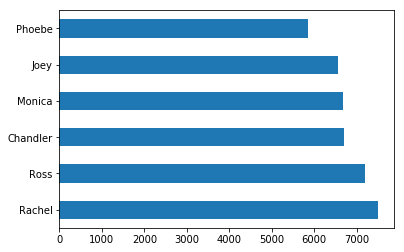

In [20]:
df_friends["Character"].value_counts().head(6).plot(kind = "barh")